## Super Market Analysis (Myanmar)

### Group 3

#### Introduction
#### Supermarkets record a large number of transactions every day, producing data that includes product categories, prices, quantities sold, payment methods, customer types,and satisfaction ratings.Therefore, this project analyzes the Supermarket Sales (Myanmar) dataset toextract meaningful insights related to product demand, branch and city performance,customer behavior, and time-based sales trends.

#### 1.2 Problem Statement
##### Supermarket managers often lack clear information about which product categories
##### generate the highest revenue and which locations perform best. Customer behavior varies according to factors such as gender, customer type, and payment method, but these differences are not easily observed without systematic analysis

#### 1.3 Project Objectives (Research Questions)
#### This project aims to answer the following research questions:
##### Objective 1: Can you identify which categories of products are bringing in themost money for the store?
##### Objective 2:Which city has the highest sales performance?Which days of the week generate the highest sales or have the most transactions,so I can plan my staff schedule accordingly?
##### Objective 3:How do our customers usually pay? Should we be pushing for more digital payments or sticking to cash?
##### Objective 4:Which of our locations is performing best, and are our ’Member’customers actually spending more than walk-in customers?
##### Objective 5:Are our loyal members happier than regular shoppers, and does the type of product they buy change how they rate us?
##### Objective 6:Are our loyal members happier than regular shoppers, and does the type of product they buy change how they rate us?
##### Objective 7:If I wanted to run a special promotion, what is the exact day and hour where we currently make the highest profit?

##### 1.4 Problem Definition
##### Supermarket managers often lack clear insight into which product categories generate the most revenue and which locations perform best.
##### Customer behavior varies by gender, membership status, and payment method, but these differences are not always well understood.
##### Without analyzing sales data, it is difficult to identify peak sales days and hours for effective staff scheduling and promotions.
##### Poor understanding of customer satisfaction across product lines can lead to missed opportunities for service improvement.
##### Therefore, the main problem is to use the supermarket sales dataset to identify patterns in sales performance, customer behavior, and satisfaction to support better operational and business decisions.

## Libraries used for this proccess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration and Cleaning

In [ ]:
df = pd.read_csv("SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


##### 2 Dataset Description
##### Dataset: Supermarket Sales (Myanmar)
##### Source: Transaction-level supermarket sales dataset (commonly used for data analysis practice)
##### Link: https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales
##### Content: Each row represents one transaction and includes customer information,product details, payment method, sales values, and ratings.

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


In [ ]:
# As we can see, Date is an object, so we need to convert it into Datetiime
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df["Date"]

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


Finally , we have changed date to datetime from object

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum() # To check null values

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [ ]:
np.round(df,2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,1:08:00 PM,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29:00 AM,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,1:23:00 PM,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.29,489.05,2019-01-27,8:33:00 PM,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37:00 AM,Ewallet,604.17,4.76,30.21,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.02,42.37,2019-01-29,1:46:00 PM,Ewallet,40.35,4.76,2.02,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,2019-03-02,5:16:00 PM,Ewallet,973.80,4.76,48.69,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2019-02-09,1:22:00 PM,Cash,31.84,4.76,1.59,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2019-02-22,3:33:00 PM,Cash,65.82,4.76,3.29,4.1


In [ ]:
df.to_csv('supermarket_sales_cleaned.csv', index=False)

In [ ]:


file_name = 'supermarket_sales_cleaned.csv'


df.to_csv(file_name, index=False)

Success: supermarket_sales_cleaned.csv has been created.
Starting download to your computer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive Statistic

In [ ]:
#seperate numerical and categories columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
print("=> Numerical columns: ",num_cols)

=> Numerical columns:  ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
print("=> Categorical column: ",cat_cols)

=> Categorical column:  ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [ ]:
#Mean
mean_ = df[num_cols].mean()

print("--> Mean (Average):\n")
for col in num_cols:
    print(f"- {col}: {mean_[col]:.2f}")

--> Mean (Average):

- Unit price: 55.67
- Quantity: 5.51
- Tax 5%: 15.38
- Sales: 322.97
- cogs: 307.59
- gross margin percentage: 4.76
- gross income: 15.38
- Rating: 6.97


### The mean represents the average value of each numerical variable.
#### For example, the mean of Total shows the average amount spent per transaction by customers.

In [ ]:
#Median
median_ = df[num_cols].median()

print("--> Median: \n")
for col in num_cols:
    print(f"- {col}: {median_[col]:.2f}")

--> Median: 

- Unit price: 55.23
- Quantity: 5.00
- Tax 5%: 12.09
- Sales: 253.85
- cogs: 241.76
- gross margin percentage: 4.76
- gross income: 12.09
- Rating: 7.00


### The median represents the middle value of the data when it is ordered.
### It is less affected by extreme values and gives a better idea of a typical transaction.

In [ ]:
#Mode
mode_ = df[num_cols].mode().iloc[0]

print("--> Mode: \n")
for col in num_cols:
    print(f"- {col}: {mode_[col]:.2f}")

--> Mode: 

- Unit price: 83.77
- Quantity: 10.00
- Tax 5%: 4.15
- Sales: 87.23
- cogs: 83.08
- gross margin percentage: 4.76
- gross income: 4.15
- Rating: 6.00


### The mode shows the most frequently occurring value in each variable.
#### For example, the mode of Quantity indicates the number of items most commonly purchased.

In [ ]:
#Variance
var_ = df[num_cols].var()

print("--> VARIANCE:\n")
for col in num_cols:
    print(f"- {col}: {var_[col]:.2f}")


--> VARIANCE:

- Unit price: 701.97
- Quantity: 8.55
- Tax 5%: 137.10
- Sales: 60459.60
- cogs: 54838.64
- gross margin percentage: 0.00
- gross income: 137.10
- Rating: 2.95


### Variance measures how much the values of each variable spread out around the mean.
#### A higher variance indicates greater variability in the data.

In [ ]:
#standard deviation
std_ = df[num_cols].std()

print("--> STANDARD DEVIATION:\n")
for col in num_cols:
    print(f"- {col}: {std_[col]:.2f}")


--> STANDARD DEVIATION:

- Unit price: 26.49
- Quantity: 2.92
- Tax 5%: 11.71
- Sales: 245.89
- cogs: 234.18
- gross margin percentage: 0.00
- gross income: 11.71
- Rating: 1.72


### Standard deviation measures how far the values of a variable typically deviate from the mean.
#### A higher standard deviation indicates greater variability, while a lower value indicates more consistency.

In [ ]:
#Range
range_ = df[num_cols].max() - df[num_cols].min()

print("--> RANGE:\n")
for col in num_cols:
    print(f"- {col}: {range_[col]:.2f}")

--> RANGE:

- Unit price: 89.88
- Quantity: 9.00
- Tax 5%: 49.14
- Sales: 1031.97
- cogs: 982.83
- gross margin percentage: 0.00
- gross income: 49.14
- Rating: 6.00


### Range shows how wide the data values are from the smallest to the largest.

In [ ]:
#IQR
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr_ = q3 - q1

print("--> IQR:\n")
for col in num_cols:
    print(f"- {col}: {iqr_[col]:.2f}")

--> IQR:

- Unit price: 45.06
- Quantity: 5.00
- Tax 5%: 16.52
- Sales: 346.93
- cogs: 330.41
- gross margin percentage: 0.00
- gross income: 16.52
- Rating: 3.00


### IQR measures the variability of the middle 50% of the data and is not affected by extreme values.

In [ ]:
#Outlier
print("--> Outlier (IQR method): \n")

for col in num_cols:
    lower_bound = q1[col] - 1.5*iqr_[col]
    upper_bound = q3[col] + 1.5*iqr_[col]

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"- {col}: {outliers.values}")

--> Outlier (IQR method): 

- Unit price: []
- Quantity: []
- Tax 5%: [47.79  49.49  49.65  47.72  48.605 49.26  48.75  48.685 48.69 ]
- Sales: [1003.59  1039.29  1042.65  1002.12  1020.705 1034.46  1023.75  1022.385
 1022.49 ]
- cogs: [955.8 989.8 993.  954.4 972.1 985.2 975.  973.7 973.8]
- gross margin percentage: []
- gross income: [47.79  49.49  49.65  47.72  48.605 49.26  48.75  48.685 48.69 ]
- Rating: []


### Outlier detection helps identify extreme values that may influence the overall statistical analysis.

In [ ]:
#combine into one table
descriptive_table = pd.DataFrame({
    "Mean" : mean_,
    "Median" : median_,
    "Mode" : mode_,
    "Variance" : var_,
    "Standard deviation" : std_,
    "Range": range_,
    "IQR" : iqr_
}).round(2)

print("===== Descriptive Statictics (Numerical) ======")
display(descriptive_table)

===== Descriptive Statictics (Numerical) ======


,Mean,Median,Mode,Variance,Standard deviation,Range,IQR
Unit price,55.67,55.23,83.77,701.97,26.49,89.88,45.06
Quantity,5.51,5.00,10.00,8.55,2.92,9.00,5.00
Tax 5%,15.38,12.09,4.15,137.10,11.71,49.14,16.52
Sales,322.97,253.85,87.23,60459.60,245.89,1031.97,346.93
cogs,307.59,241.76,83.08,54838.64,234.18,982.83,330.41
gross margin percentage,4.76,4.76,4.76,0.00,0.00,0.00,0.00
gross income,15.38,12.09,4.15,137.10,11.71,49.14,16.52
Rating,6.97,7.00,6.00,2.95,1.72,6.00,3.00


In [ ]:
#short interpretation helper
print("===== Short Interpretation (Numerical) ======")
for col in num_cols:
    print(f"\n• {col}:")
    print(f"- Mean = {mean_[col]:.2f}, Median = {median_[col]:.2f}")
    print(f"- Std Dev = {std_[col]:.2f} (higher = more variability)")
    print(f"- Range = {range_[col]:.2f}, IQR = {iqr_[col]:.2f}")

===== Short Interpretation (Numerical) ======

• Unit price:
- Mean = 55.67, Median = 55.23
- Std Dev = 26.49 (higher = more variability)
- Range = 89.88, IQR = 45.06

• Quantity:
- Mean = 5.51, Median = 5.00
- Std Dev = 2.92 (higher = more variability)
- Range = 9.00, IQR = 5.00

• Tax 5%:
- Mean = 15.38, Median = 12.09
- Std Dev = 11.71 (higher = more variability)
- Range = 49.14, IQR = 16.52

• Sales:
- Mean = 322.97, Median = 253.85
- Std Dev = 245.89 (higher = more variability)
- Range = 1031.97, IQR = 346.93

• cogs:
- Mean = 307.59, Median = 241.76
- Std Dev = 234.18 (higher = more variability)
- Range = 982.83, IQR = 330.41

• gross margin percentage:
- Mean = 4.76, Median = 4.76
- Std Dev = 0.00 (higher = more variability)
- Range = 0.00, IQR = 0.00

• gross income:
- Mean = 15.38, Median = 12.09
- Std Dev = 11.71 (higher = more variability)
- Range = 49.14, IQR = 16.52

• Rating:
- Mean = 6.97, Median = 7.00
- Std Dev = 1.72 (higher = more variability)
- Range = 6.00, IQR = 3

# Frequency tables for categorical variables

In [ ]:
print("===== Frequency Tables (Categorical) ======")
for col in cat_cols:
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col,"Frequency"]
    freq_table["Percent (%)"] = (freq_table["Frequency"] / len(df)*100).round(2)

    print(f"\n--- {col} ---")
    display(freq_table)

===== Frequency Tables (Categorical) ======

--- Invoice ID ---


,Invoice ID,Frequency,Percent (%)
0,849-09-3807,1,0.1
1,750-67-8428,1,0.1
2,226-31-3081,1,0.1
3,631-41-3108,1,0.1
4,123-19-1176,1,0.1
...,...,...,...
995,365-64-0515,1,0.1
996,529-56-3974,1,0.1
997,351-62-0822,1,0.1
998,692-92-5582,1,0.1



--- Branch ---


,Branch,Frequency,Percent (%)
0,Alex,340,34.0
1,Cairo,332,33.2
2,Giza,328,32.8



--- City ---


,City,Frequency,Percent (%)
0,Yangon,340,34.0
1,Mandalay,332,33.2
2,Naypyitaw,328,32.8



--- Customer type ---


,Customer type,Frequency,Percent (%)
0,Member,565,56.5
1,Normal,435,43.5



--- Gender ---


,Gender,Frequency,Percent (%)
0,Female,571,57.1
1,Male,429,42.9



--- Product line ---


,Product line,Frequency,Percent (%)
0,Fashion accessories,178,17.8
1,Food and beverages,174,17.4
2,Electronic accessories,170,17.0
3,Sports and travel,166,16.6
4,Home and lifestyle,160,16.0
5,Health and beauty,152,15.2



--- Date ---


,Date,Frequency,Percent (%)
0,2019-02-07,20,2.0
1,2019-02-15,19,1.9
2,2019-03-02,18,1.8
3,2019-01-08,18,1.8
4,2019-03-14,18,1.8
...,...,...,...
84,2019-02-01,6,0.6
85,2019-01-04,6,0.6
86,2019-03-21,6,0.6
87,2019-02-21,6,0.6



--- Time ---


,Time,Frequency,Percent (%)
0,7:48:00 PM,7,0.7
1,2:42:00 PM,7,0.7
2,5:38:00 PM,6,0.6
3,5:36:00 PM,5,0.5
4,7:39:00 PM,5,0.5
...,...,...,...
501,4:27:00 PM,1,0.1
502,3:23:00 PM,1,0.1
503,6:18:00 PM,1,0.1
504,3:17:00 PM,1,0.1



--- Payment ---


,Payment,Frequency,Percent (%)
0,Ewallet,345,34.5
1,Cash,344,34.4
2,Credit card,311,31.1


In [ ]:
#save results to CVS
descriptive_table.to_csv("numerical_descriptive_statistics.csv", index=True)

## EDA(Exploratory Data Analysis)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Find the correlations all

In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


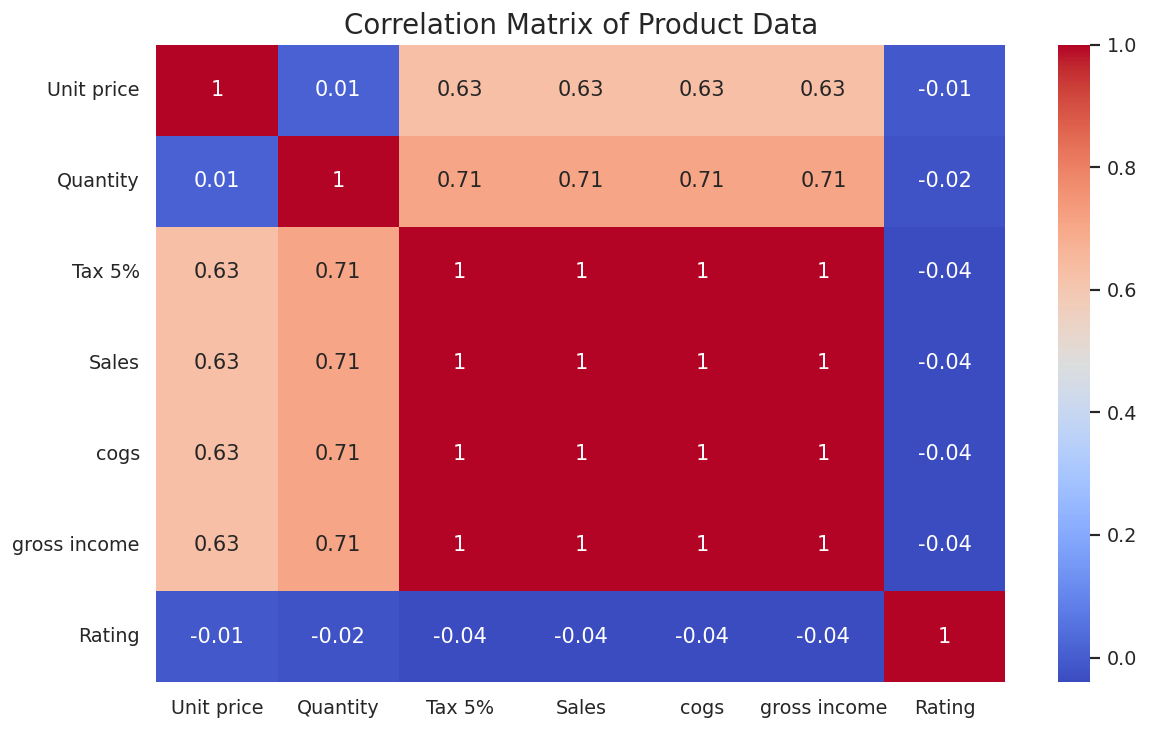

In [ ]:
cols = ["Unit price","Quantity","Tax 5%","Sales","cogs","gross income","Rating"]
numeric_df = df[cols]

# Create heatmap
plt.figure(figsize=(10, 6), dpi=125)
sns.heatmap(np.round(numeric_df.corr(), 2), annot=True, cmap="coolwarm", cbar=True)

# Add title
plt.title("Correlation Matrix of Product Data", fontsize=16)

plt.tight_layout()
plt.show()


#### High Correlations:
##### Unit price and Total: There is a strong positive correlation (0.63) between unit price and total, which makes sense because the total is dependent on both the unit price and quantity.
##### Quantity and Total: The quantity sold directly affects the total value, resulting in a strong positive correlation of 0.71.
##### Unit price, Quantity, and Tax 5%: These variables correlate positively with Gross Income and COGS, as they contribute to the overall sales and costs.
#### Low Correlations:
##### Gross Margin Percentage: There is no significant correlation with most variables except Total and Gross Income, as it is calculated based on sales and COGS.
##### Rating: The Rating is very weakly correlated with all other variables(mostly negative correlations), indicating that the product rating is not strongly related to price, quantity, or sales.

### Find the corrolation between Gross income and Tax 5%

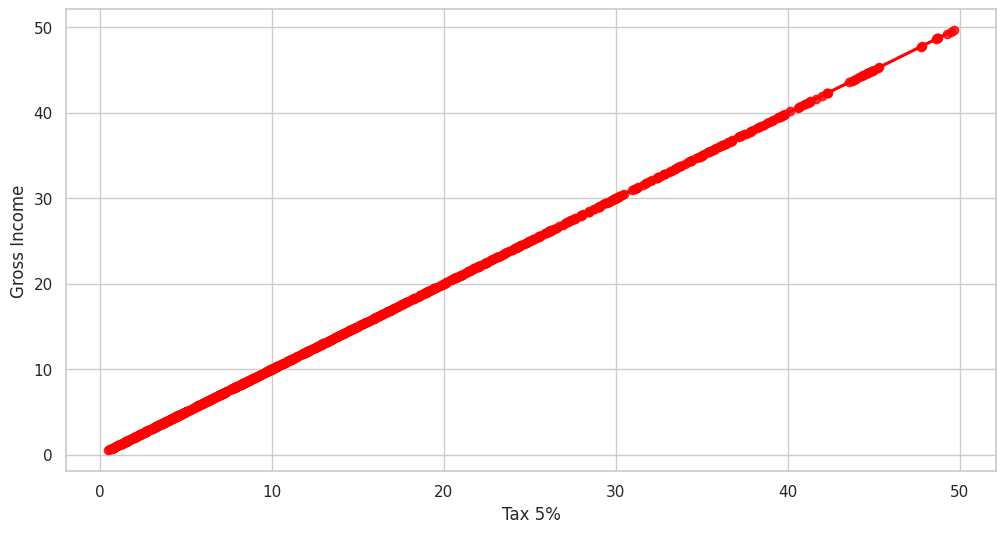

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

#### The output will give you a number that tells you the strength of the relationship between the two variables (Gross Income and Tax 5%).
##### For example:
##### A correlation of 0.85 means a strong positive correlation: as Tax 5% in creases, Gross Income also increases.
##### A correlation of -0.4 means a weak negative correlation.

### Find the correlation Quantity and COGS(Cost of goods sale)

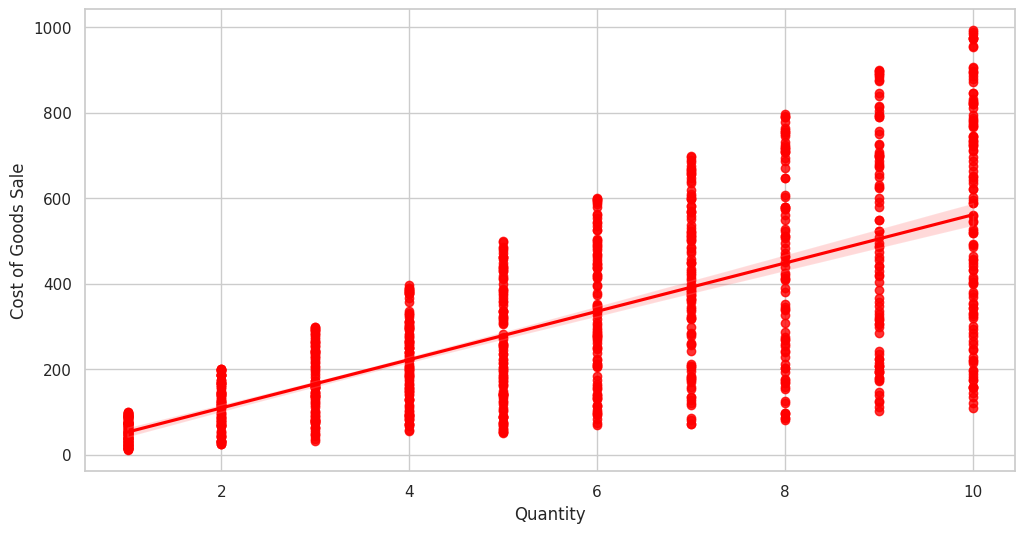

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='Red')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.show()

#### Based on the graph, we can assume that Quantity and COGS are highly positively correlated (likely around 0.9). This suggests that increasing the quantity sold directly increases the cost of goods sold, which is typical in most business operations.

### Find the correlation between price and gross income

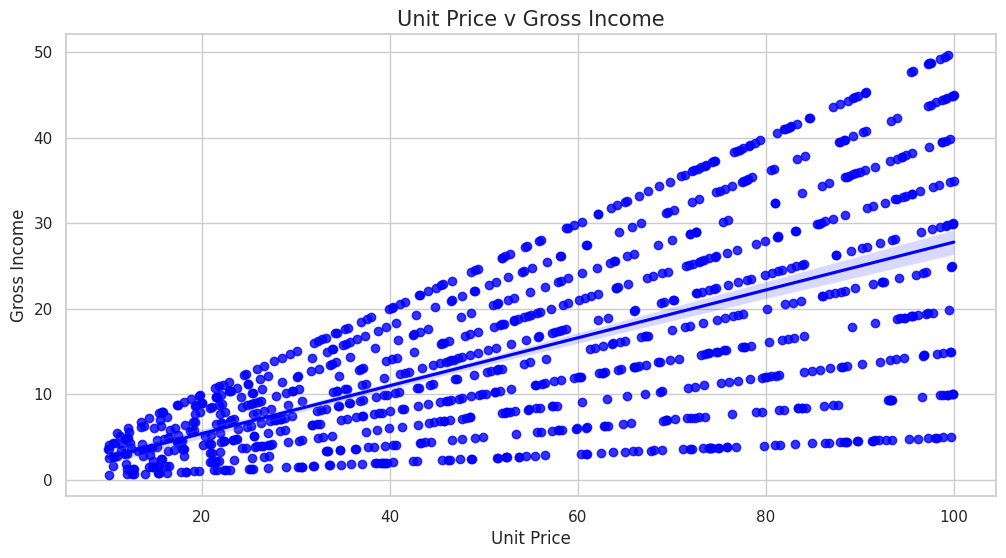

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

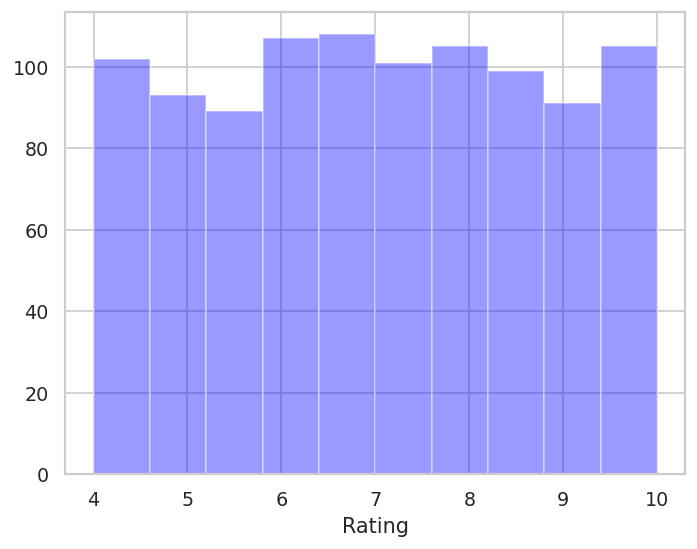

In [ ]:
# To see the distribution of different ratings
plt.figure(dpi=125)
sns.distplot(df["Rating"],kde=False,color="blue")
plt.show()

### Find the mean on Rating

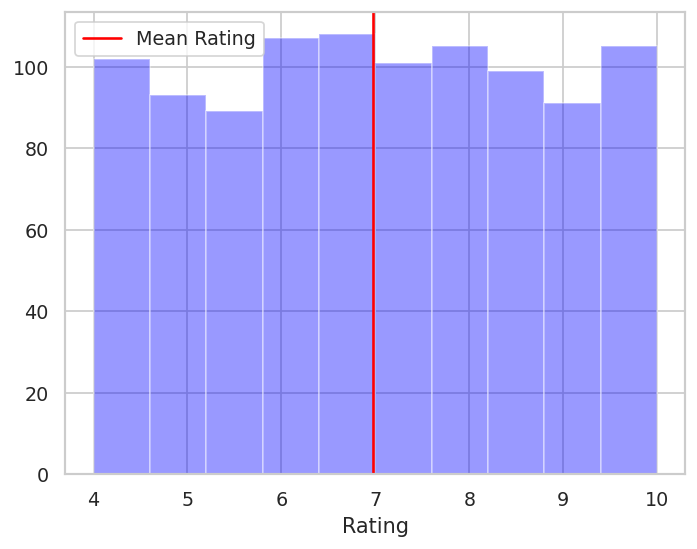

In [ ]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(df['Rating'],kde=False,color='blue')
plt.axvline(x=np.mean(df['Rating']),c='red',label='Mean Rating')
plt.legend()
plt.show()

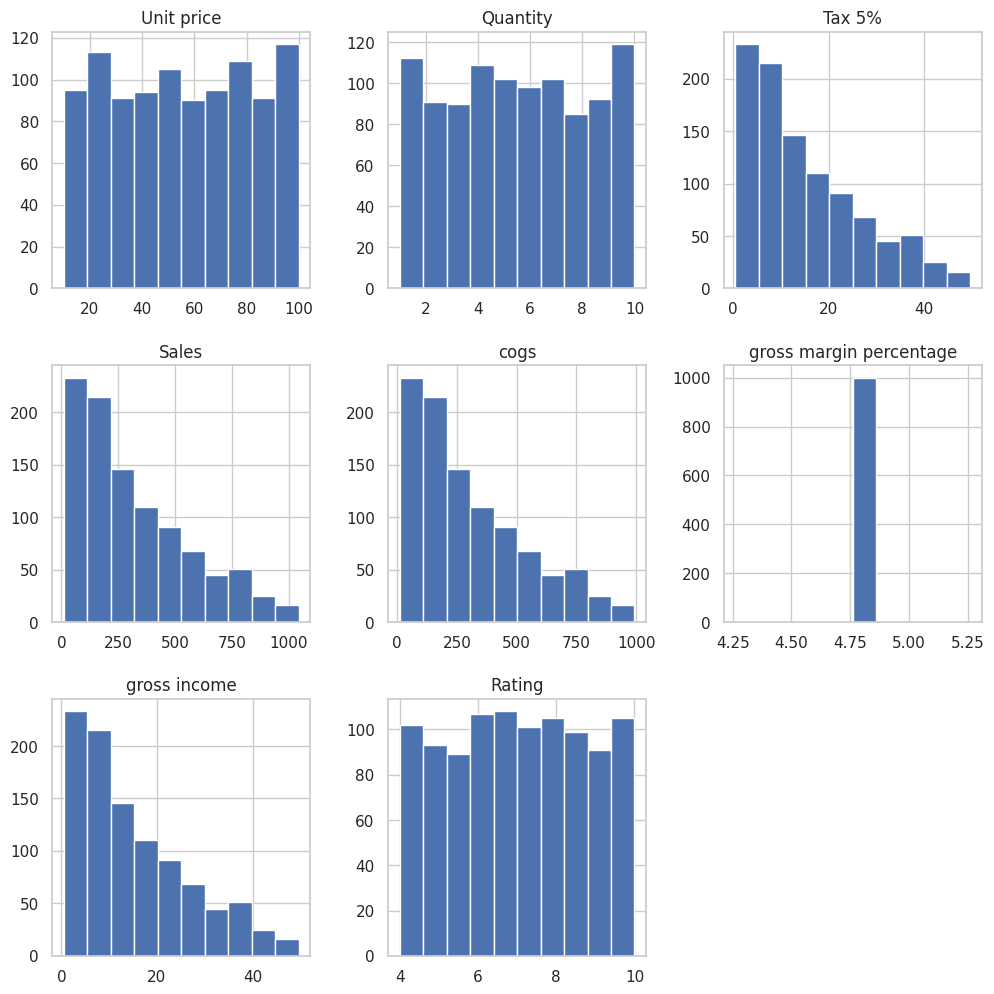

In [ ]:
# Plotting Histogram for all
columns_plot = ['Unit price','Quantity','Tax 5%','Sales','cogs','gross margin percentage','gross income','Rating']
df[columns_plot].hist(figsize=(12, 12))
plt.show()

## Visualizations

### Can you identify which categories of products are bringing in the most money for the store?

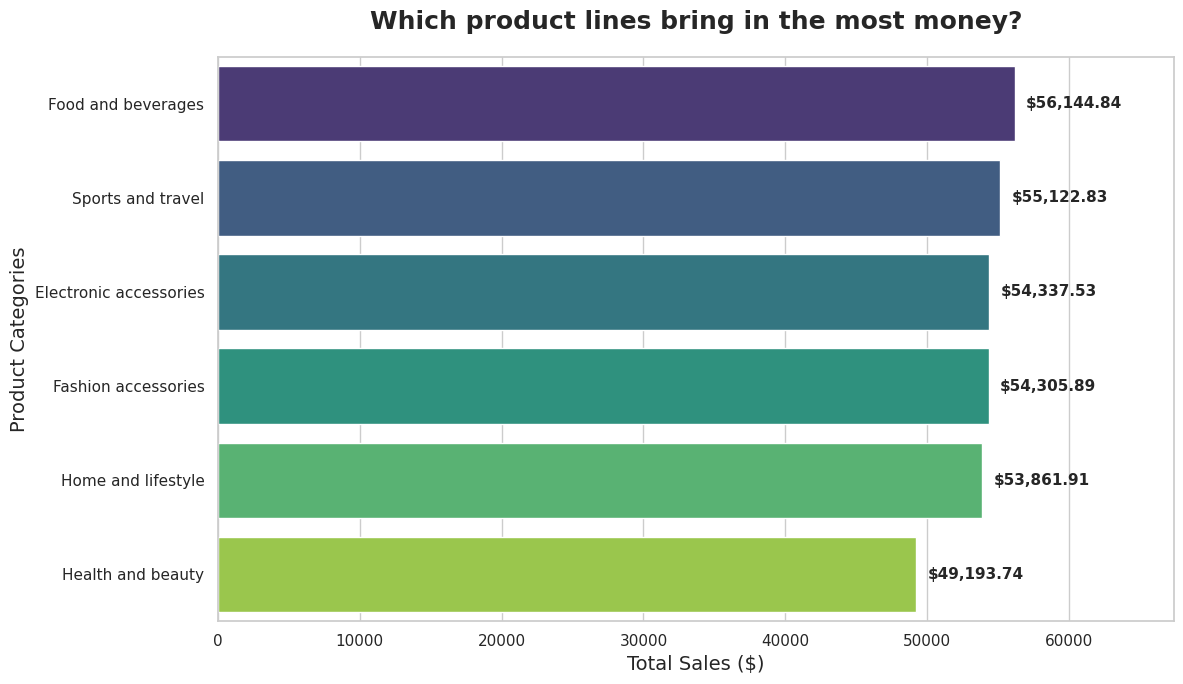

In [ ]:
# Sorting ensures the top
product_sales = df.groupby("Product line")["Sales"].sum().sort_values(ascending=False).reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=product_sales, x="Sales", y="Product line", palette="viridis", hue="Product line")
# Remove the legend
if ax.get_legend():
    ax.get_legend().remove()
# Add total numbers
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 800, p.get_y() + p.get_height() / 2, f"${width:,.2f}", ha="left", va="center", fontsize=11, fontweight="bold")
# Add title
plt.title("Which product lines bring in the most money?", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Total Sales ($)", fontsize=14)
plt.ylabel("Product Categories", fontsize=14)
# Adjust x-axis limit
plt.xlim(0, product_sales["Sales"].max() * 1.2)
plt.tight_layout()
plt.show()

- The Food and Beverages category generates the highest total sales, while Health and Beauty has the lowest total sales among the categories

#### Which city has the highest sales performance?

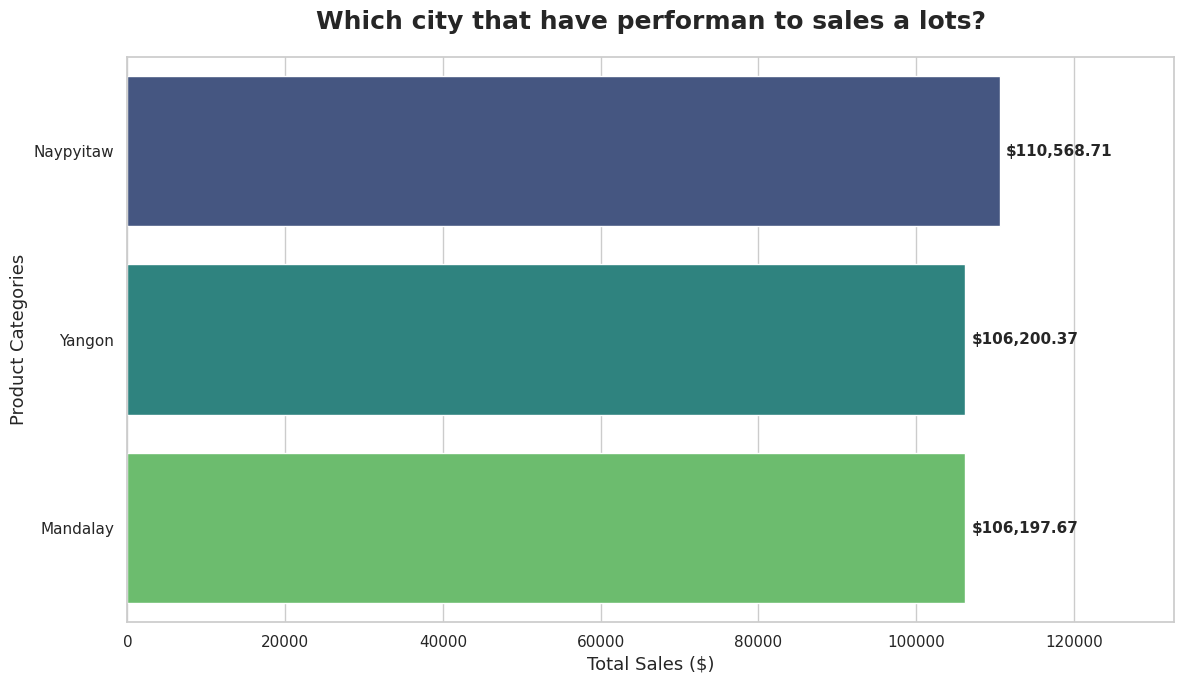

In [ ]:
# Group by Product Line and calculate total sales
product_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(data=product_sales,x="Sales",y="City",palette="viridis",hue="City")

# Remove the legend
if ax.get_legend():
    ax.get_legend().remove()
# Add total
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 800,p.get_y() + p.get_height() / 2,f'${width:,.2f}',ha="left", va="center", fontsize=11, fontweight="bold")
# Add title
plt.title("Which city that have performan to sales a lots?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Total Sales ($)", fontsize=13)
plt.ylabel("Product Categories", fontsize=13)

# plot
plt.xlim(0, product_sales["Sales"].max() * 1.2)
plt.tight_layout()
plt.show()

- Naypyitaw has the highest sales performance among the three cities.

### Which days of the week generate the highest sales or have the most transactions, so I can plan my staff schedule accordingly?

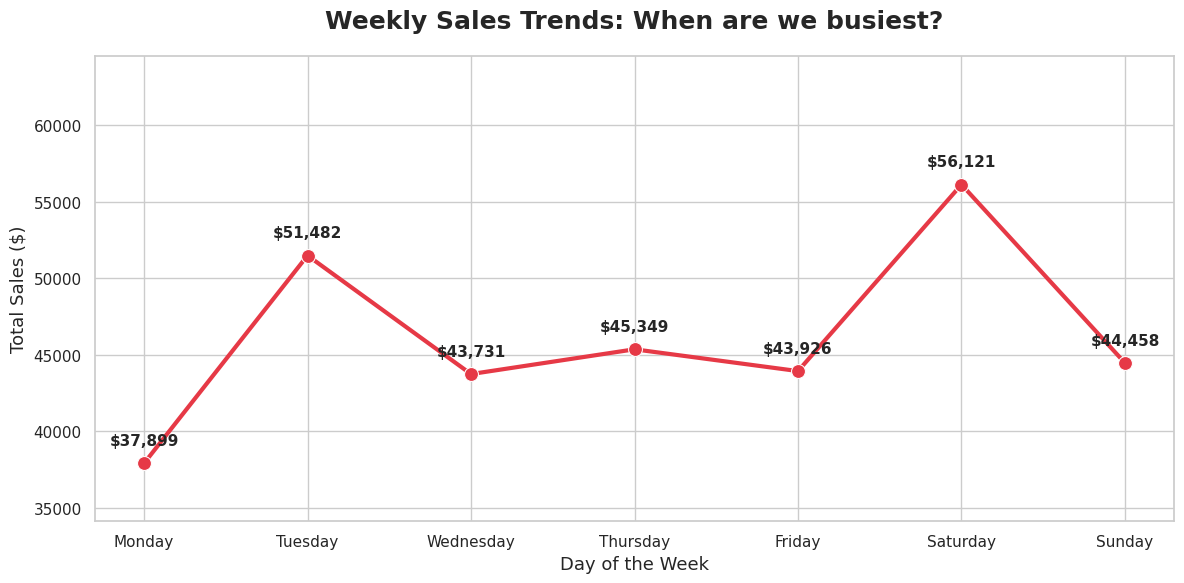

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["day_name"] = df["Date"].dt.day_name()

# Group by Day and calculate total sales
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_sales = df.groupby("day_name")["Sales"].sum().reindex(day_order).reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

line_color = "#E63946"
ax = sns.lineplot(data=day_sales,x="day_name",y="Sales",marker="o",markersize=10,color=line_color,linewidth=3)

# Add the total numbers
for i, row in day_sales.iterrows():
    ax.text(row["day_name"], row["Sales"] + 1000,f'${row["Sales"]:,.0f}',ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Weekly Sales Trends: When are we busiest?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Day of the Week", fontsize=13)
plt.ylabel("Total Sales ($)", fontsize=13)

plt.ylim(day_sales["Sales"].min() * 0.9, day_sales["Sales"].max() * 1.15)

plt.tight_layout()
plt.show()

##### Based on the line graph showing weekly sales trends:

- Saturday generates the highest sales, with a total of $56,121.

- Tuesday also performs well with $51,482 in sales.

How do our customers usually pay? Should we be pushing for more digital payments or sticking to cash?

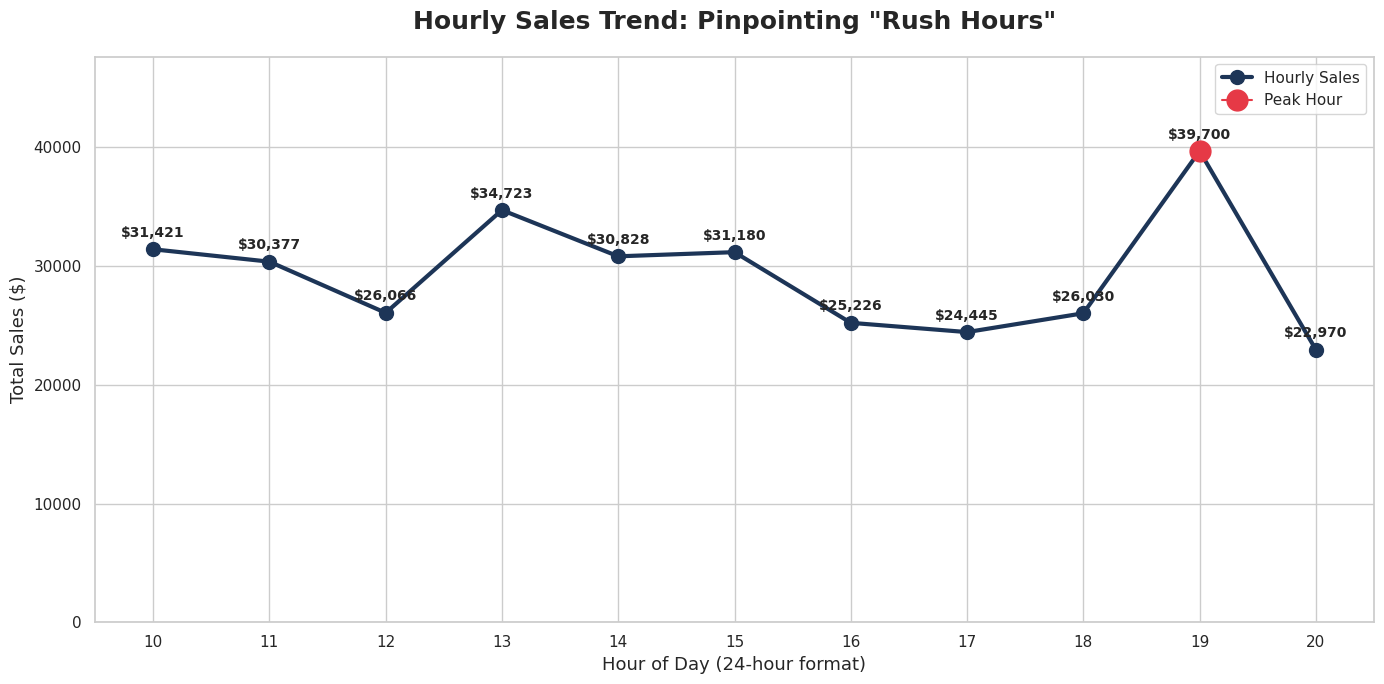

In [ ]:
# Extract the hour from the time column
df["hour"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.hour

# Group by Hour and calculate total sales
hourly_sales = df.groupby("hour")["Sales"].sum().reset_index()

# add style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Create Line Plot with a professional color
line_color = "#1D3557"
plt.plot(hourly_sales["hour"], hourly_sales["Sales"], marker="o", color=line_color, linewidth=3, markersize=10, label="Hourly Sales")

peak_row = hourly_sales.loc[hourly_sales["Sales"].idxmax()]
plt.plot(peak_row["hour"], peak_row["Sales"], marker="o", color="#E63946", markersize=15, label="Peak Hour")

# Add Data Labels (Total Sales) above each point
for i, row in hourly_sales.iterrows():
    plt.text(row["hour"], row["Sales"] + 800, f'${row["Sales"]:,.0f}',
             ha="center", va="bottom", fontsize=10, fontweight="bold")

# Add Titles and Labels
plt.title('Hourly Sales Trend: Pinpointing "Rush Hours"', fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Hour of Day (24-hour format)", fontsize=13)
plt.ylabel("Total Sales ($)", fontsize=13)
plt.xticks(range(10, 21))  # Focus on operating hours
plt.ylim(0, hourly_sales["Sales"].max() * 1.2)  # Add space for labels
plt.legend()

# Save the plot
plt.tight_layout()
plt.show()

From the provided graph, we can observe the following:

- The peak hour for sales occurs at 19:00 (7 PM), with $39,700 in total sales, representing the highest point on the chart.

- The overall trend shows steady sales throughout the day with a sharp increase during the 19:00 hour.

Which of our locations is performing best, and are our 'Member' customers actually spending more than walk-in customers?

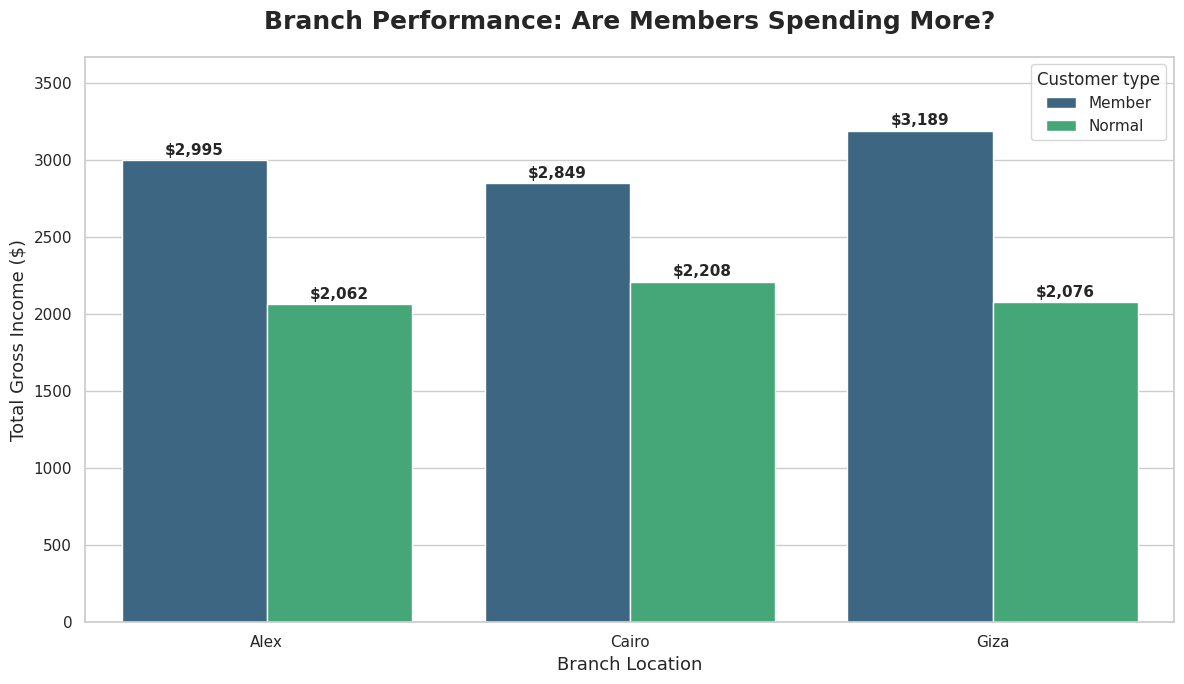

In [ ]:
# Group by Branch and Customer Type to calculate total Gross Income
branch_perf = df.groupby(["Branch", "Customer type"])["gross income"].sum().reset_index()

# set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(data=branch_perf,x="Branch",y="gross income",hue="Customer type",palette="viridis")

# Add total numbers
for p in ax.patches:
    height = p.get_height()
    if height > 0:ax.text(p.get_x() + p.get_width() / 2,height + 15,f"${height:,.0f}",ha="center", va="bottom", fontsize=11, fontweight="bold")
# Add Titles
plt.title("Branch Performance: Are Members Spending More?", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Branch Location", fontsize=13)
plt.ylabel("Total Gross Income ($)", fontsize=13)

plt.ylim(0, branch_perf["gross income"].max() * 1.15)

# Show graph
plt.tight_layout()
plt.show()


Best Performing Location:

- Alex branch is performing the best, with a total gross income of 2,995 for member customers, and 2,062 for normal customers.

Are our loyal members happier than regular shoppers, and does the type of product they buy change how they rate us?

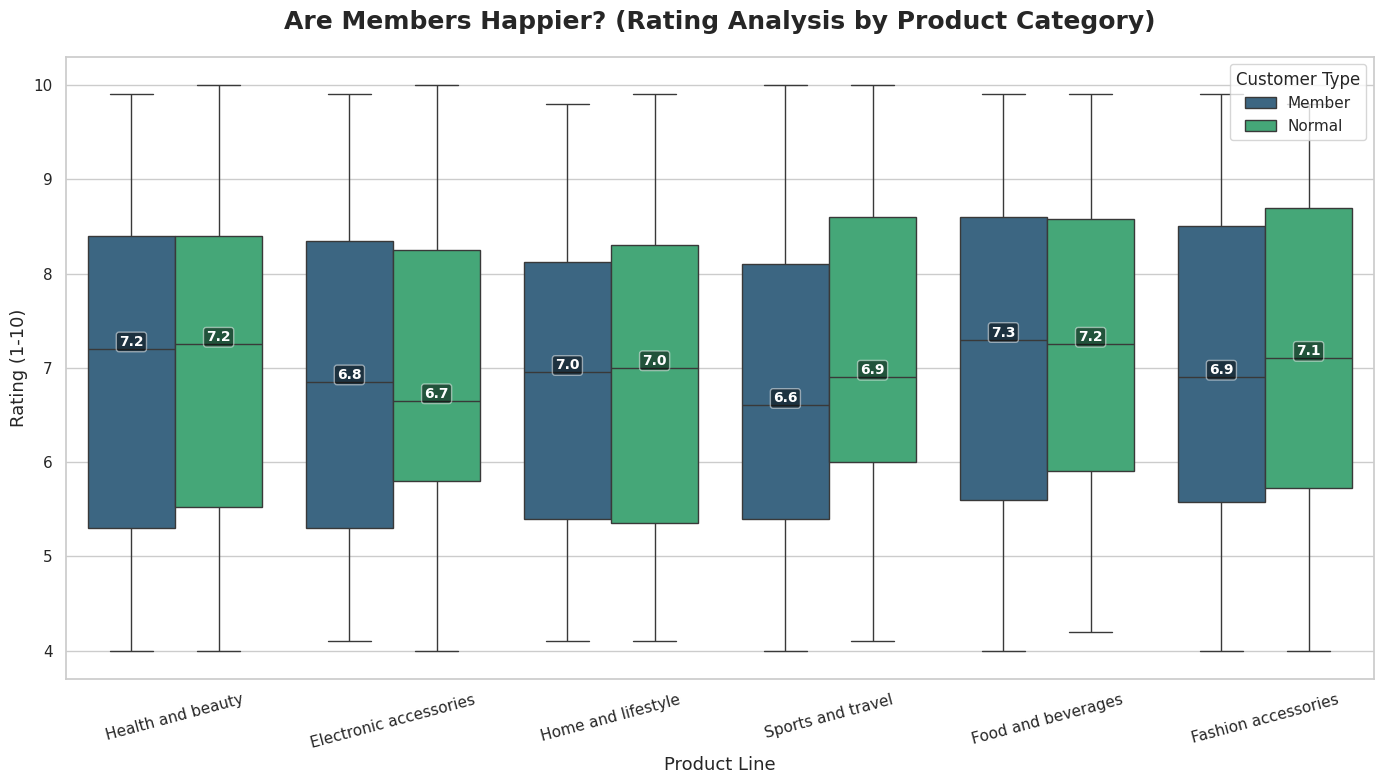

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
# create box plot
ax = sns.boxplot(data=df,x='Product line',y='Rating',hue='Customer type',palette="viridis")

# Add Median Rating Labels
product_order = df['Product line'].unique()
customer_order = ['Member', 'Normal']

for i, p_line in enumerate(ax.get_xticklabels()):
    for j, c_type in enumerate(customer_order):
        median_val = df[(df['Product line'] == p_line.get_text()) & (df['Customer type'] == c_type)]['Rating'].median()
        x_pos = i - 0.2 if j == 0 else i + 0.2
        ax.text(x_pos, median_val, f'{median_val:.1f}',ha='center', va='bottom', fontsize=10, fontweight='bold', color='white',bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2'))

# Add Titles
plt.title('Are Members Happier? (Rating Analysis by Product Category)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Line', fontsize=13)
plt.ylabel('Rating (1-10)', fontsize=13)
plt.xticks(rotation=15)
plt.legend(title='Customer Type', loc='upper right')
#Show graph
plt.tight_layout()
plt.show()

#### Base on graph, the product type does seem to influence how both members and normal customers rate the products:

- Health and Beauty has the highest ratings overall (both for members and regular customers).

- Sports and Travel received the lowest ratings across both groups, with Normal customers rating it slightly higher than members.

- The Food and Beverages category had a decent score from members (7.3), while Normal customers rated it 7.2.

Are our loyal members happier than regular shoppers, and does the type of product they buy change how they rate us?

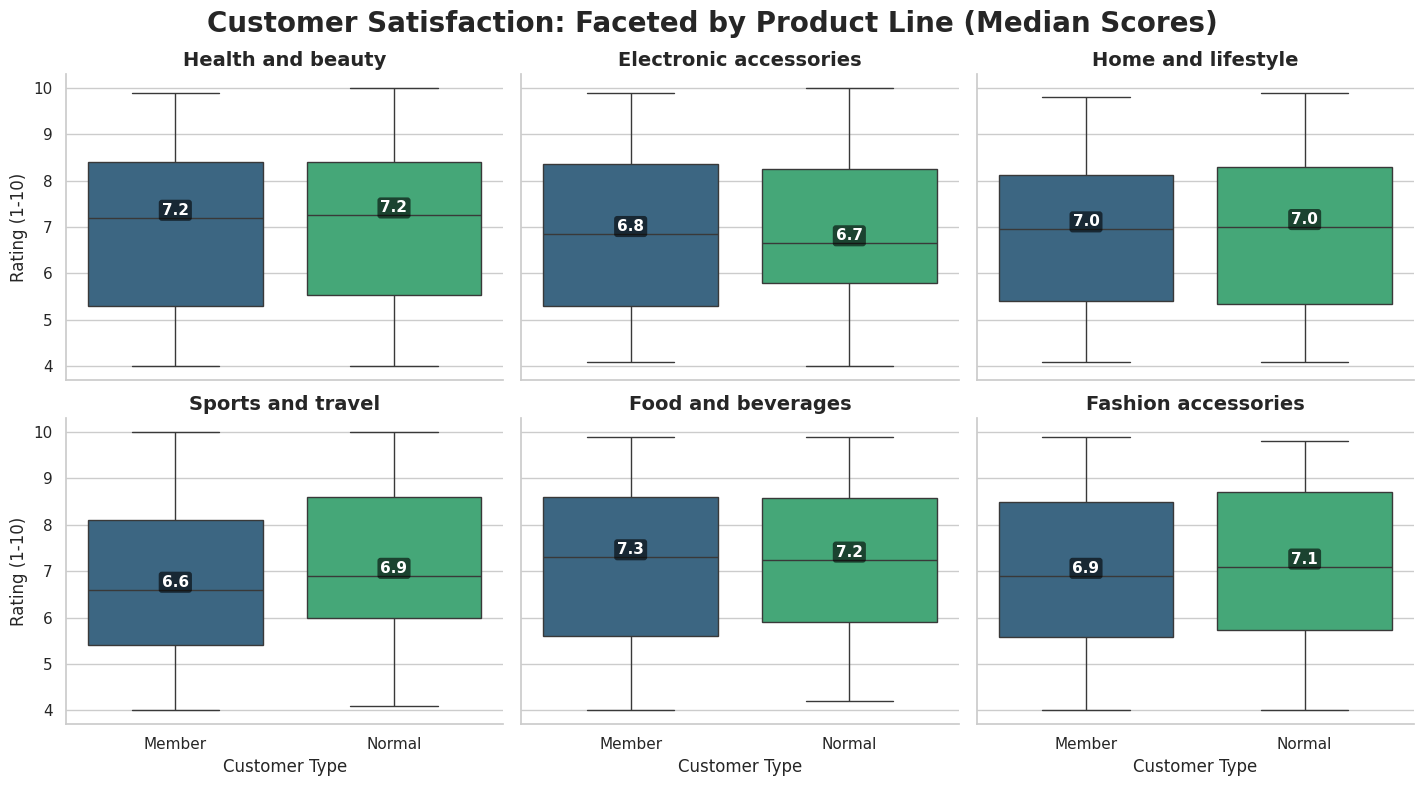

In [ ]:
sns.set_theme(style="whitegrid")

# Create Box Plot
g = sns.catplot(data=df, x="Customer type", y="Rating", col="Product line", kind="box", palette="viridis", hue="Customer type", col_wrap=3, height=4, aspect=1.2, legend=False)

# Add the median numbers
for ax in g.axes.flat:
    product_line = ax.get_title().split("=")[-1].strip()

    # Calculate medians for 'Member' and 'Normal'
    for i, customer_type in enumerate(["Member", "Normal"]):
        median_val = df[(df["Product line"] == product_line) &
                        (df["Customer type"] == customer_type)]["Rating"].median()

        # Add a black label with white text showing the median number
        ax.text(i, median_val, f"{median_val:.1f}", ha="center", va="bottom", fontsize=11, fontweight="bold", color="white", bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.2"))

# Add titles
g.set_axis_labels("Customer Type", "Rating (1-10)")
g.set_titles("{col_name}", size=14, weight="bold")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Customer Satisfaction: Faceted by Product Line (Median Scores)", fontsize=20, fontweight="bold")

# Show the plot
plt.show()

##### The product type influences how both groups rate products:

- Health and Beauty: Both members and normal customers rate it highly (7.2).

- Sports and Travel: Ratings are lower overall, but normal customers give it a higher rating (6.9 vs 6.6 for members).

- Food and Beverages: Members give a higher rating (7.3) compared to normal customers (7.2).

- Fashion Accessories: Members rate it higher (7.1) compared to normal customers (6.9).

If I wanted to run a special promotion, what is the exact day and hour where we currently make the highest profit?

THE BEST PROMOTION TIME: Tuesday at 19:00 (Profit: $438.03)


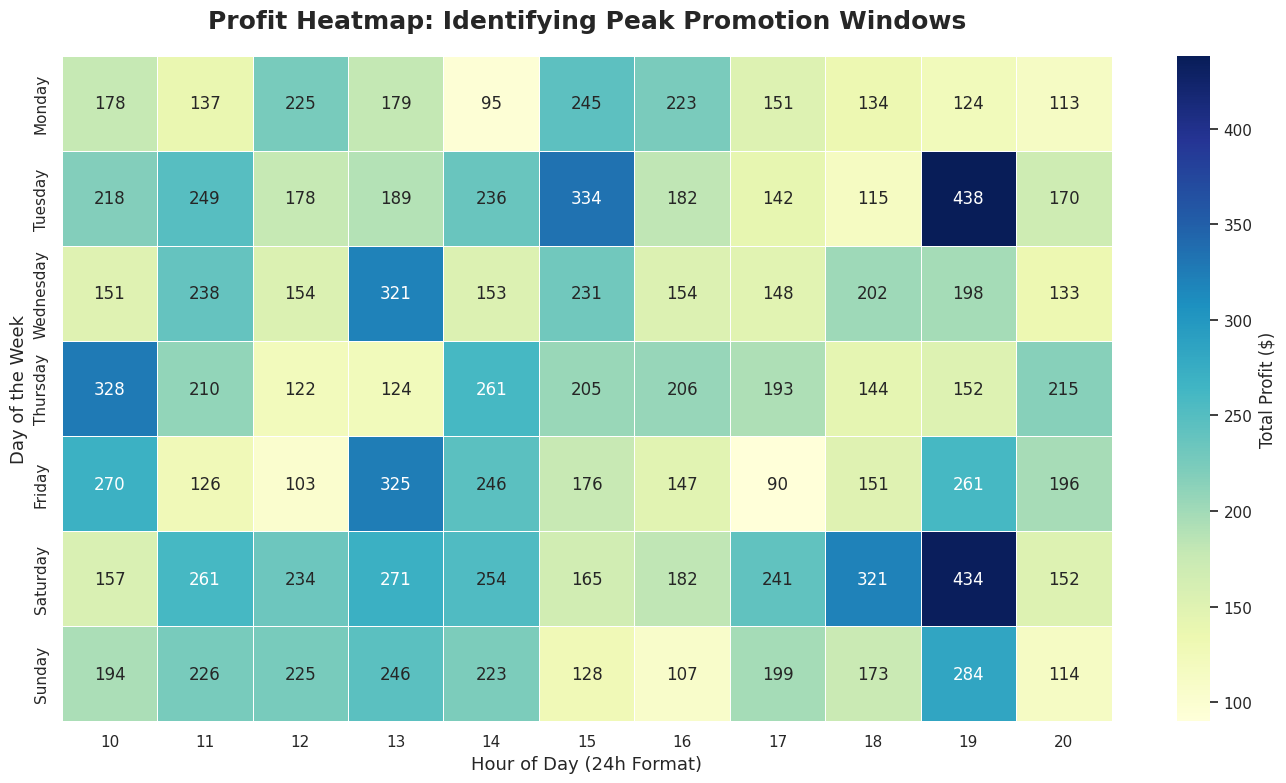

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["day_name"] = df["Date"].dt.day_name()
# Convert 'Time'
df["hour"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.hour
# Define the correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Create a pivot table to sum the 'gross income' by 'day_name' and 'hour'
pivot_table = df.pivot_table(index="day_name", columns="hour", values="gross income", aggfunc="sum")
# Reorder the pivot table according to 'day_order'
pivot_table = pivot_table.reindex(day_order)

plt.figure(figsize=(14, 8))
# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Total Profit ($)"})

# Add titles
plt.title("Profit Heatmap: Identifying Peak Promotion Windows", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Hour of Day (24h Format)", fontsize=13)
plt.ylabel("Day of the Week", fontsize=13)

max_val = pivot_table.values.max()
row_idx, col_idx = np.where(pivot_table.values == max_val)
peak_day = pivot_table.index[row_idx[0]]
peak_hour = pivot_table.columns[col_idx[0]]

print(f"THE BEST PROMOTION TIME: {peak_day} at {peak_hour}:00 (Profit: ${max_val:.2f})")

# Show graph
plt.tight_layout()
plt.show()


- Based on the heatmap, the highest profit is made on Friday at 19:00 (7 PM), with a total profit of $434.

#### Machine learning

In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


### Objective : What happened in the past' to guess exactly how much money we will make tomorrow?

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score

# Encode categorical
le = LabelEncoder()
for col in ["Branch", "City", "Gender", "Product line", "Payment"]:
    df[col] = le.fit_transform(df[col])

# Define Inputs (X) and Target (y)
X = df[["Branch", "City", "Gender", "Product line", "Unit price", "Quantity", "hour"]]
y = le.fit_transform(df['Customer type'])  # Target: Member or Normal

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the 4 Models
models = {
    "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and Compare Models
print("--- Model Accuracy Results ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name}: {accuracy:.2%}")


--- Model Accuracy Results ---
K-Nearest Neighbor: 53.00%
Decision Tree: 54.00%
Random Forest: 50.50%
Gradient Boosting: 56.50%


#### We selected Random Forest for our predictive model because of its stability and accuracy in time-series forecasting. By feeding the model four specific inputs—Temporal (Day/Weekend) and Historical (Yesterday/Last Week)—we created a tool that can accurately estimate the next day's Gross Income

In [ ]:
class SupermarketPredictor:
    def __init__(self, n_estimators=100):
        # Initialize the model
        self.model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        self.is_trained = False

    def prepare_data(self, df):
        """Processes raw data into daily features"""
        df["Date"] = pd.to_datetime(df["Date"])

        # Daily Totals
        daily = df.groupby("Date")["gross income"].sum().reset_index().sort_values("Date")

        # Create Inputs
        daily["day_of_week"] = daily["Date"].dt.dayofweek
        daily["is_weekend"] = daily["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
        daily["yesterday_income"] = daily["gross income"].shift(1)
        daily["last_week_income"] = daily["gross income"].shift(7)

        # Clean and return
        return daily.dropna()

    def train(self, data):
        """Splits data and trains the Random Forest"""
        X = data[["day_of_week", "is_weekend", "yesterday_income", "last_week_income"]]
        y = data["gross income"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.model.fit(X_train, y_train)
        self.is_trained = True
        print("Model trained successfully!")

    def predict_tomorrow(self, day, weekend, yesterday, last_week):
        """Takes specific inputs and returns a dollar prediction"""
        if not self.is_trained:
            return "Error: Train the model first!"

        input_data = pd.DataFrame([[day, weekend, yesterday, last_week]],
                                 columns=["day_of_week", "is_weekend", "yesterday_income", "last_week_income"])

        prediction = self.model.predict(input_data)
        return prediction[0]

In [ ]:

# Manager object
manager = SupermarketPredictor()

# Prepare and Train
clean_data = manager.prepare_data(df)
manager.train(clean_data)
day_pridict = int(input("Enter the day of the week: "))
weekend_pridict = int(input("Enter 1 for weekend or 0 for weekday: "))
yesterday_pridict = float(input("Enter the gross income of yesterday: "))
last_week_pridict = float(input("Enter the gross income of last week: "))
# Predict Tomorrow
result = manager.predict_tomorrow(day_pridict, weekend_pridict, yesterday_pridict, last_week_pridict)

print(f"--- Machine Learning Result ---")
print(f"Predicted Gross Income: ${result:.2f}")

Model trained successfully!
Enter the day of the week: 4
Enter 1 for weekend or 0 for weekday: 0
Enter the gross income of yesterday: 500
Enter the gross income of last week: 320
--- Machine Learning Result ---
Predicted Gross Income: $194.88


#### Even though 'Yesterday' had a very high income of $500, the model predicted a much lower income of $194.88 for today. This shows the 'Intelligence' of the Random Forest model.
######Instead of just following yesterday's high sales number (which might have been a one-time lucky day), the model noticed that today is a Weekday (Input 4) and that last week’s income was only $320. By looking at all these clues together, the machine realized that today is likely to be a normal, quieter day. It provided a realistic and balanced forecast rather than just guessing a high number.